In [5]:
import pandas as pd
import pickle 
df=pd.read_csv('user_profiles_for_ads.csv')
df.head()

,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests
0,1,25-34,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,1.7,0.193,0.067,25,20k-40k,Digital Marketing
1,2,65+,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,7.7,0.114,0.044,68,0-20k,Data Science
2,3,45-54,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,5.6,0.153,0.095,80,60k-80k,Fitness and Wellness
3,4,35-44,Female,Rural,Spanish,PhD,9182,152,Desktop Only,3.1,4.2,0.093,0.061,65,100k+,"Gaming, DIY Crafts"
4,5,25-34,Female,Urban,English,Technical,6848,371,Mobile Only,2.0,3.8,0.175,0.022,99,20k-40k,"Fitness and Wellness, Investing and Finance, G..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   User ID                          1000 non-null   int64  
 1   Age                              1000 non-null   object 
 2   Gender                           1000 non-null   object 
 3   Location                         1000 non-null   object 
 4   Language                         1000 non-null   object 
 5   Education Level                  1000 non-null   object 
 6   Likes and Reactions              1000 non-null   int64  
 7   Followed Accounts                1000 non-null   int64  
 8   Device Usage                     1000 non-null   object 
 9   Time Spent Online (hrs/weekday)  1000 non-null   float64
 10  Time Spent Online (hrs/weekend)  1000 non-null   float64
 11  Click-Through Rates (CTR)        1000 non-null   float64
 12  Conversion Rates     

In [7]:
#DROPPING USER ID COLUMN
df.drop(columns=['User ID'],axis=1,inplace=True)
df.head()

,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests
0,25-34,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,1.7,0.193,0.067,25,20k-40k,Digital Marketing
1,65+,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,7.7,0.114,0.044,68,0-20k,Data Science
2,45-54,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,5.6,0.153,0.095,80,60k-80k,Fitness and Wellness
3,35-44,Female,Rural,Spanish,PhD,9182,152,Desktop Only,3.1,4.2,0.093,0.061,65,100k+,"Gaming, DIY Crafts"
4,25-34,Female,Urban,English,Technical,6848,371,Mobile Only,2.0,3.8,0.175,0.022,99,20k-40k,"Fitness and Wellness, Investing and Finance, G..."


In [8]:
#CHECKING NULL VALUES
df.isnull().sum()

Age                                0
Gender                             0
Location                           0
Language                           0
Education Level                    0
Likes and Reactions                0
Followed Accounts                  0
Device Usage                       0
Time Spent Online (hrs/weekday)    0
Time Spent Online (hrs/weekend)    0
Click-Through Rates (CTR)          0
Conversion Rates                   0
Ad Interaction Time (sec)          0
Income Level                       0
Top Interests                      0
dtype: int64

In [9]:
#EXTRACTING NUMERICAL AND CATEGORICAL FEATURES
num_features=[col for col in df.columns if df[col].dtype!='object']
cat_features=[col for col in df.columns if df[col].dtype=='object']

In [13]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
num_pipeline=Pipeline(
    steps=[
        ('scaler',StandardScaler())
    ]
)
cat_pipeline=Pipeline(
    steps=[
        ('encoder',OneHotEncoder())
    ]
)

In [14]:
preprocessor=ColumnTransformer([
    ('num_pipeline',num_pipeline,num_features),
    ('cat_pipeline',cat_pipeline,cat_features)
])

In [15]:
#SAVING PREPROCESSOR OBJECT
with open('preprocessor.pkl','wb') as file:
  pickle.dump(preprocessor,file)

In [16]:
#APPLYING preprocessor object on our dataset
transformed_df=preprocessor.fit_transform(df)

In [28]:
#MODEL TRAINING AND HYPERPARAMETER TUNING
from sklearn.cluster import KMeans 
model=KMeans(n_clusters=5,random_state=42)
model.fit(transformed_df)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [29]:
#SAVING MODEL OBJECT
with open('best_model.pkl','wb') as file:
  pickle.dump(model,file)


In [30]:
#CLUSTER LABELS
# Access the cluster labels from the best_model
cluster_labels = model.labels_
df['Cluster Labels']=cluster_labels
df.head()

,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests,Cluster Labels
0,25-34,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,1.7,0.193,0.067,25,20k-40k,Digital Marketing,2
1,65+,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,7.7,0.114,0.044,68,0-20k,Data Science,1
2,45-54,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,5.6,0.153,0.095,80,60k-80k,Fitness and Wellness,0
3,35-44,Female,Rural,Spanish,PhD,9182,152,Desktop Only,3.1,4.2,0.093,0.061,65,100k+,"Gaming, DIY Crafts",4
4,25-34,Female,Urban,English,Technical,6848,371,Mobile Only,2.0,3.8,0.175,0.022,99,20k-40k,"Fitness and Wellness, Investing and Finance, G...",4


In [31]:
#CALCULATING MEAN OF NUMERICAL FEATURES FOR EACH CLUSTER
cluster_wise_avg_numerical_features=df.groupby('Cluster Labels')[num_features].mean()
cluster_wise_avg_numerical_features.reset_index(inplace=True)
cluster_wise_avg_numerical_features

,Cluster Labels,Likes and Reactions,Followed Accounts,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec)
0,0,3447.609375,184.916667,3.434375,5.914583,0.132714,0.075792,109.734375
1,1,6138.810680,364.019417,1.647087,4.829612,0.110354,0.068995,82.747573
2,2,5717.370892,235.380282,3.187324,2.612676,0.185197,0.049230,80.446009
3,3,2679.687179,211.425641,2.517949,3.700000,0.070821,0.029795,89.779487
4,4,6856.747423,255.577320,3.035567,6.150000,0.123000,0.024454,96.226804


In [32]:
#CALCULATING MODE OF CATEGORICAL FEATURES
# Group by 'Cluster Labels' and then apply a lambda function to each categorical column
cluster_wise_mode_cat_features = df.groupby('Cluster Labels')[cat_features].agg(lambda x: x.mode()[0])
cluster_wise_mode_cat_features.reset_index(inplace=True)
cluster_wise_mode_cat_features

,Cluster Labels,Age,Gender,Location,Language,Education Level,Device Usage,Income Level,Top Interests
0,0,25-34,Female,Suburban,Spanish,Master,Desktop Only,100k+,Investing and Finance
1,1,25-34,Female,Urban,Hindi,High School,Mobile + Desktop,60k-80k,Fashion Modelling
2,2,45-54,Male,Suburban,English,Bachelor,Mobile + Desktop,20k-40k,Pet Care
3,3,45-54,Male,Suburban,Spanish,High School,Mobile Only,80k-100k,Gaming
4,4,25-34,Female,Urban,Mandarin,Master,Desktop Only,40k-60k,Gourmet Cooking


In [33]:
cluster_df=pd.merge(cluster_wise_avg_numerical_features,cluster_wise_mode_cat_features,on='Cluster Labels')
cluster_df

,Cluster Labels,Likes and Reactions,Followed Accounts,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Age,Gender,Location,Language,Education Level,Device Usage,Income Level,Top Interests
0,0,3447.609375,184.916667,3.434375,5.914583,0.132714,0.075792,109.734375,25-34,Female,Suburban,Spanish,Master,Desktop Only,100k+,Investing and Finance
1,1,6138.810680,364.019417,1.647087,4.829612,0.110354,0.068995,82.747573,25-34,Female,Urban,Hindi,High School,Mobile + Desktop,60k-80k,Fashion Modelling
2,2,5717.370892,235.380282,3.187324,2.612676,0.185197,0.049230,80.446009,45-54,Male,Suburban,English,Bachelor,Mobile + Desktop,20k-40k,Pet Care
3,3,2679.687179,211.425641,2.517949,3.700000,0.070821,0.029795,89.779487,45-54,Male,Suburban,Spanish,High School,Mobile Only,80k-100k,Gaming
4,4,6856.747423,255.577320,3.035567,6.150000,0.123000,0.024454,96.226804,25-34,Female,Urban,Mandarin,Master,Desktop Only,40k-60k,Gourmet Cooking


ANALYZING THE CLUSTER DATAFRAME AND DRAWING NECESSARY INSIGHTS FROM EACH CLUSTER

Text(0.5, 1.0, 'CLUSTERS vs AD INTERACTION TIME')

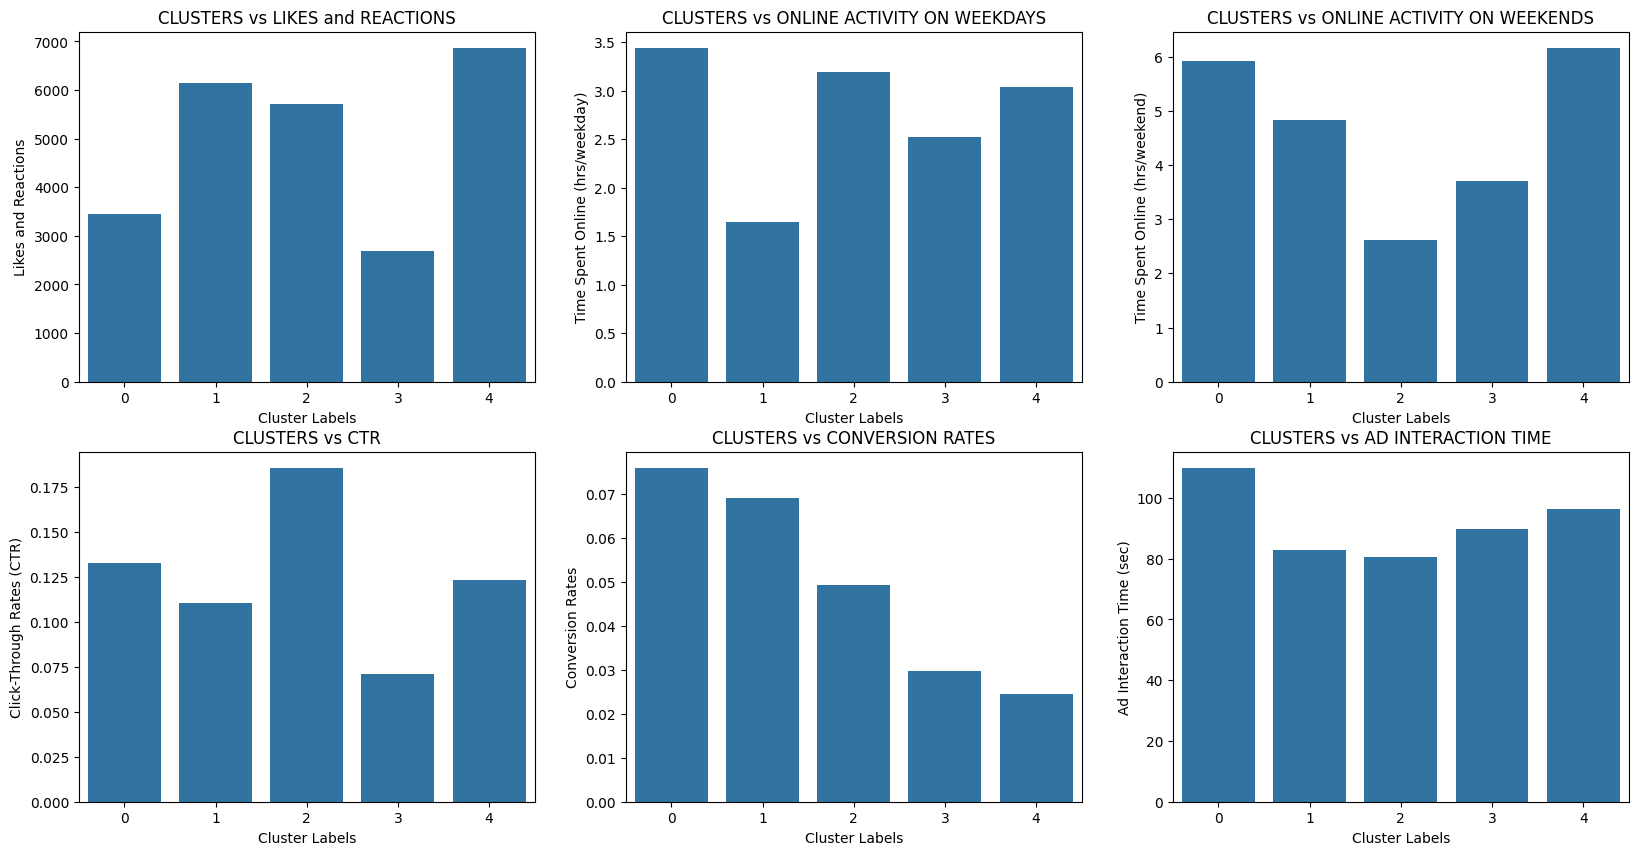

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
my_grid=plt.GridSpec(2,3)

my_fig=plt.figure(figsize=(20,10))
my_fig.add_subplot(my_grid[0,0])
sns.barplot(data=cluster_df,x='Cluster Labels',y='Likes and Reactions')
plt.title('CLUSTERS vs LIKES and REACTIONS')

my_fig.add_subplot(my_grid[0,1])
sns.barplot(data=cluster_df,x='Cluster Labels',y='Time Spent Online (hrs/weekday)')
plt.title('CLUSTERS vs ONLINE ACTIVITY ON WEEKDAYS')

my_fig.add_subplot(my_grid[0,2])
sns.barplot(data=cluster_df,x='Cluster Labels',y='Time Spent Online (hrs/weekend)')
plt.title('CLUSTERS vs ONLINE ACTIVITY ON WEEKENDS')

my_fig.add_subplot(my_grid[1,0])
sns.barplot(data=cluster_df,x='Cluster Labels',y='Click-Through Rates (CTR)')
plt.title('CLUSTERS vs CTR')

my_fig.add_subplot(my_grid[1,1])
sns.barplot(data=cluster_df,x='Cluster Labels',y='Conversion Rates')
plt.title('CLUSTERS vs CONVERSION RATES')

my_fig.add_subplot(my_grid[1,2])
sns.barplot(data=cluster_df,x='Cluster Labels',y='Ad Interaction Time (sec)')
plt.title('CLUSTERS vs AD INTERACTION TIME')